<a href="https://colab.research.google.com/github/AkinyemiGbenga/CODSOFT/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [53]:
CreditCard_data = pd.read_csv('creditcard.csv')
CreditCard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [54]:
# check number of rows and columns
CreditCard_data.shape

(284807, 31)

The dataset has 13954 rows and 31 columns

In [55]:
CreditCard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [56]:
CreditCard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [57]:
# replacing the missing values in the 'Amount' column with the average(mean) value of the Amounts
CreditCard_data['Amount'].fillna(CreditCard_data['Amount'].mean(), inplace=True)

In [58]:
# replacing the missing values in the 'Class' column with the average(mean) value of the Class
CreditCard_data['Class'].fillna(CreditCard_data['Class'].mean(), inplace=True)

In [59]:
CreditCard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [60]:
CreditCard_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [61]:
CreditCard_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [62]:
CreditCard_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

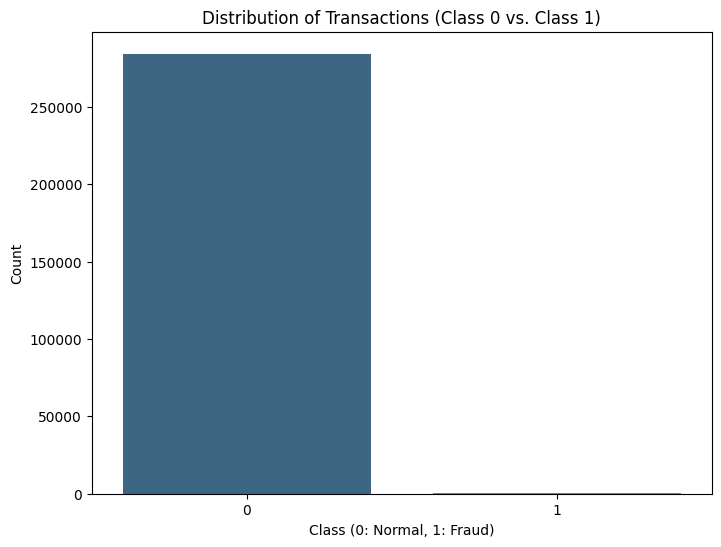

In [63]:
# Plotting the distribution of 'Class' using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=CreditCard_data, palette='viridis')
plt.title('Distribution of Transactions (Class 0 vs. Class 1)')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Count')
plt.show()


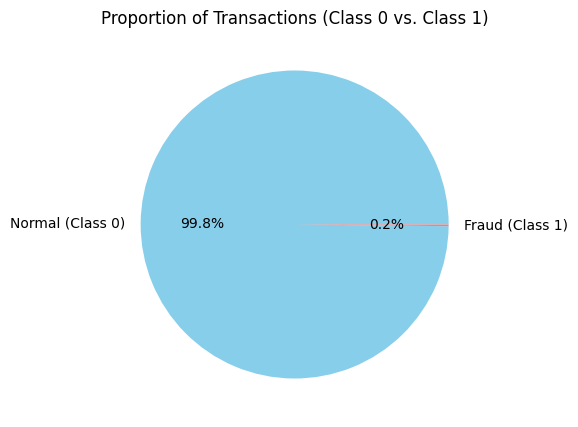

In [64]:
# Plotting the distribution of 'Class' using a pie chart
class_counts = CreditCard_data['Class'].value_counts()
labels = class_counts.index.map({0: 'Normal (Class 0)', 1: 'Fraud (Class 1)'})

plt.figure(figsize=(7, 5))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Transactions (Class 0 vs. Class 1)')
plt.show()

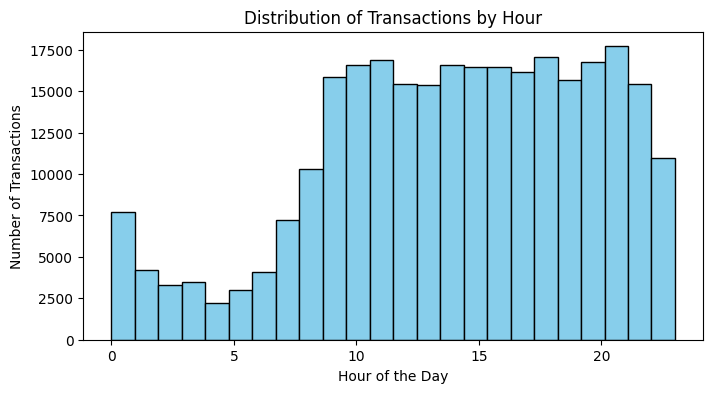

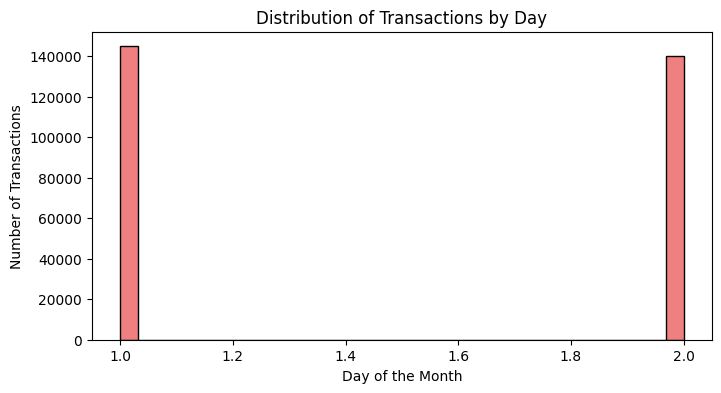

In [65]:
# Convert 'Time' to datetime format
CreditCard_data['Time'] = pd.to_datetime(CreditCard_data['Time'], unit='s')

# Extract hour and day from 'Time'
CreditCard_data['Hour'] = CreditCard_data['Time'].dt.hour
CreditCard_data['Day'] = CreditCard_data['Time'].dt.day

# Plotting the distribution of transactions by hour
plt.figure(figsize=(8, 4))
plt.hist(CreditCard_data['Hour'], bins=24, color='skyblue', edgecolor='black')
plt.title('Distribution of Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()

# Plotting the distribution of transactions by day
plt.figure(figsize=(8, 4))
plt.hist(CreditCard_data['Day'], bins=31, color='lightcoral', edgecolor='black')
plt.title('Distribution of Transactions by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Transactions')
plt.show()

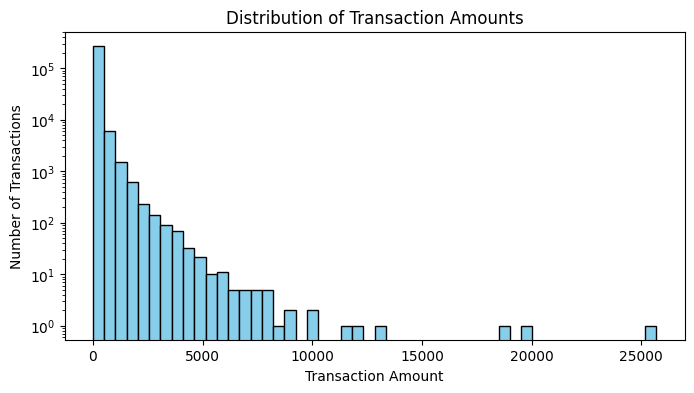

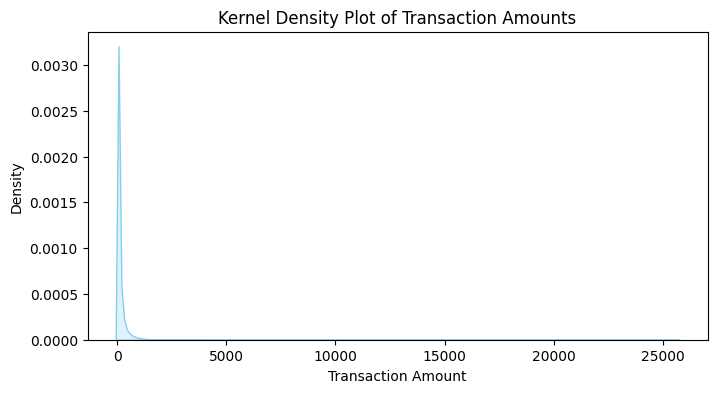

In [66]:
# Plotting the distribution of transaction amounts using a histogram
plt.figure(figsize=(8, 4))
plt.hist(CreditCard_data['Amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')  # Use log scale for better visibility if the distribution has long tails
plt.show()

# Plotting the distribution of transaction amounts using a kernel density plot
plt.figure(figsize=(8, 4))
sns.kdeplot(CreditCard_data['Amount'], fill=True, color='skyblue')
plt.title('Kernel Density Plot of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()

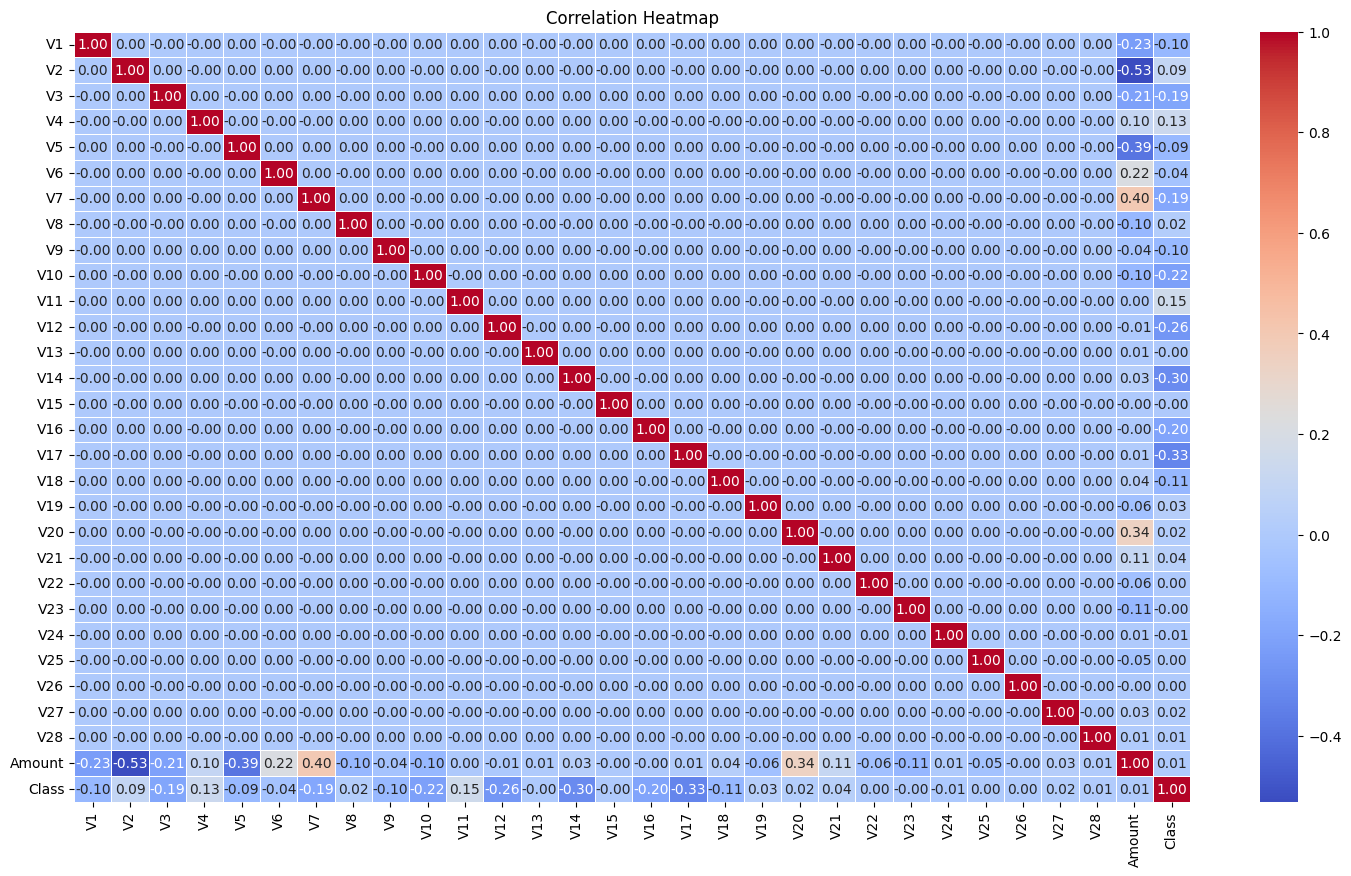

In [67]:
# Select relevant columns for the correlation heatmap
selected_columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                    'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                    'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

# Create a correlation matrix
correlation_matrix = CreditCard_data[selected_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap')
plt.show()

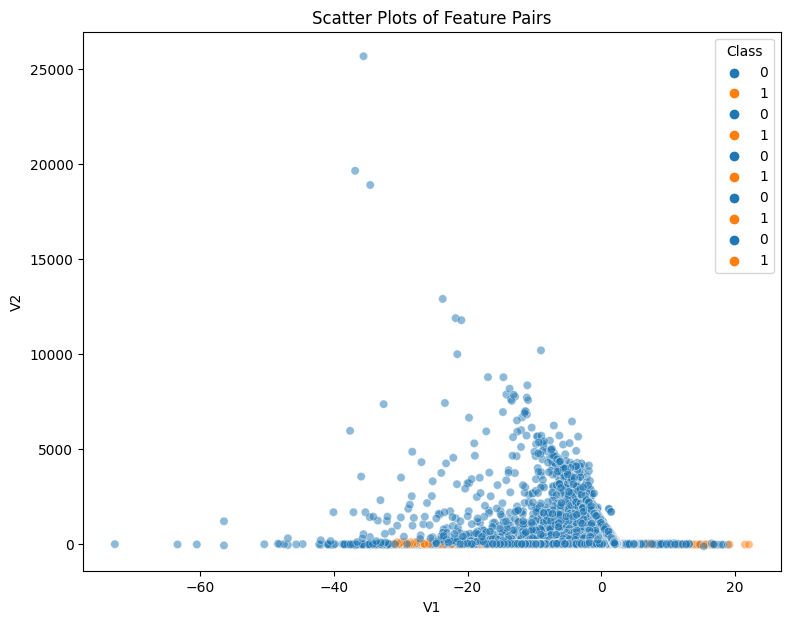

In [68]:
# Select pairs of features for scatter plots
feature_pairs = [('V1', 'V2'), ('V2', 'V3'), ('V3', 'V4'), ('V4', 'V5'), ('V1', 'Amount')]

# Create scatter plots
plt.figure(figsize=(9, 7))

for pair in feature_pairs:
    sns.scatterplot(x=pair[0], y=pair[1], hue='Class', data=CreditCard_data, alpha=0.5)

# Customize the plot
plt.title('Scatter Plots of Feature Pairs')
plt.show()

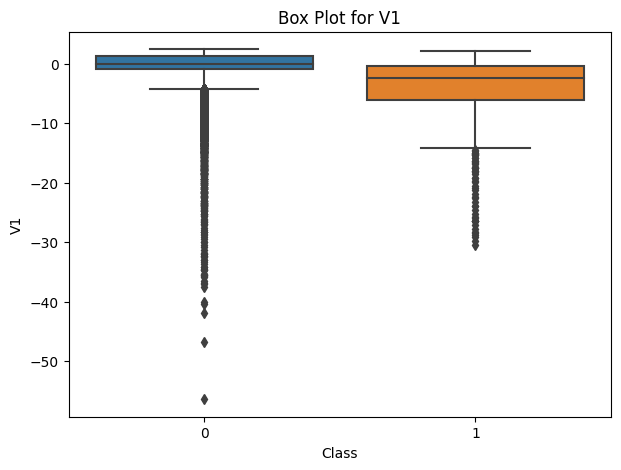

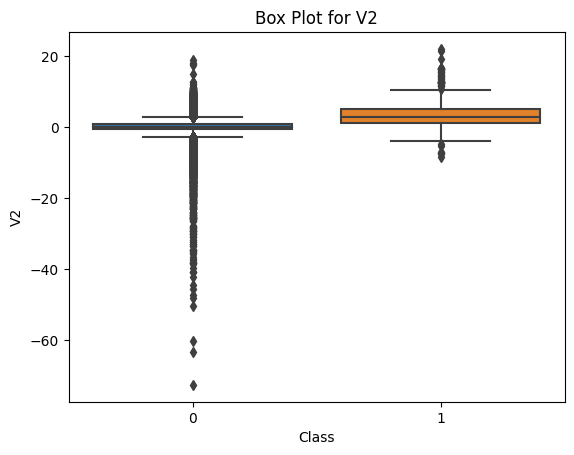

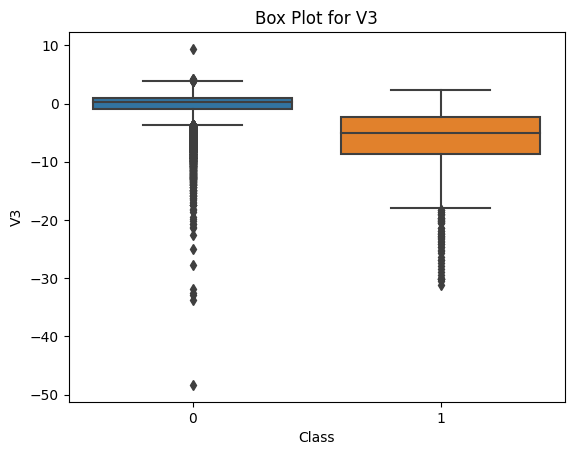

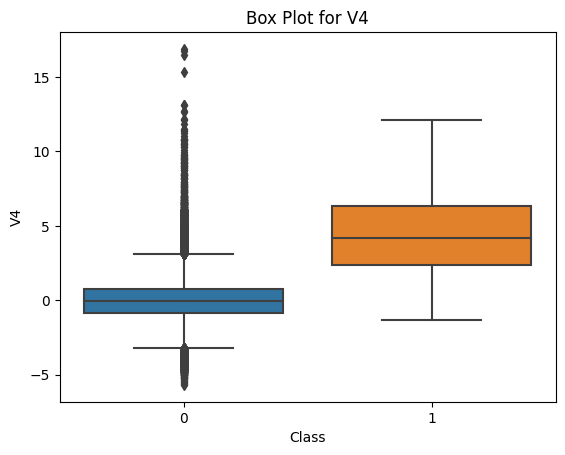

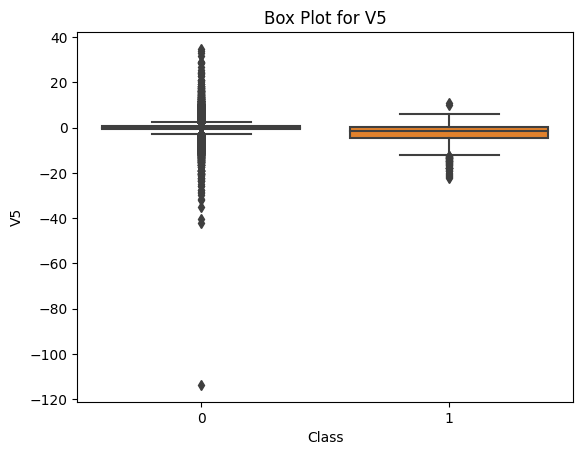

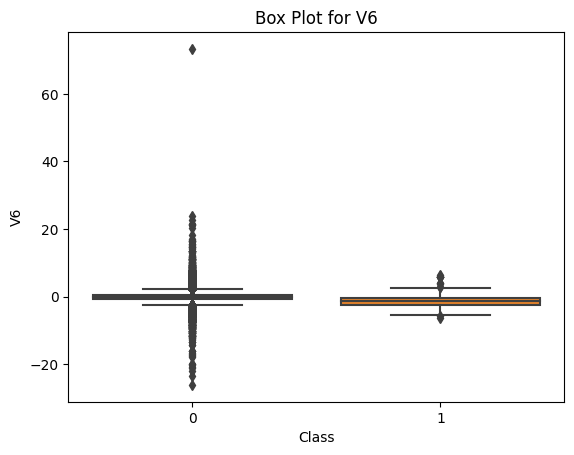

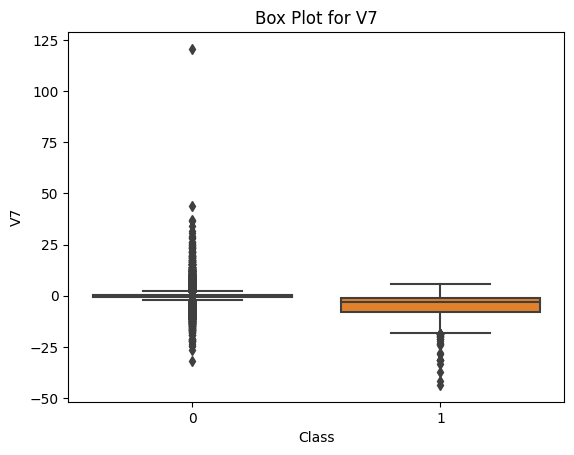

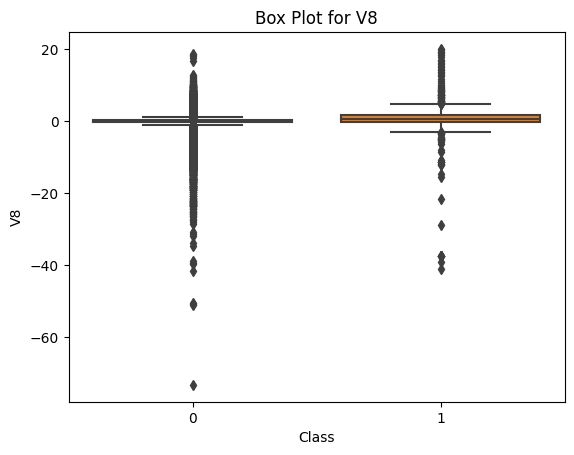

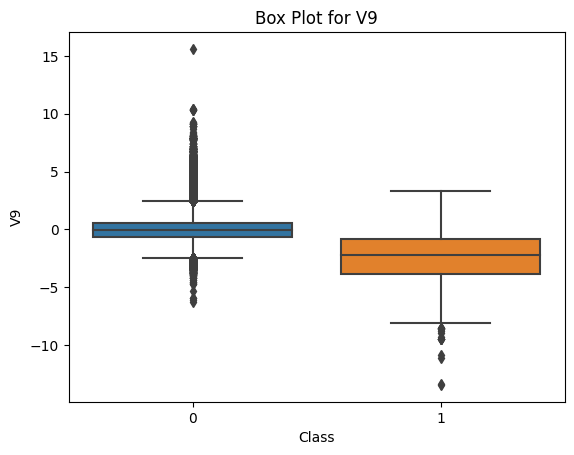

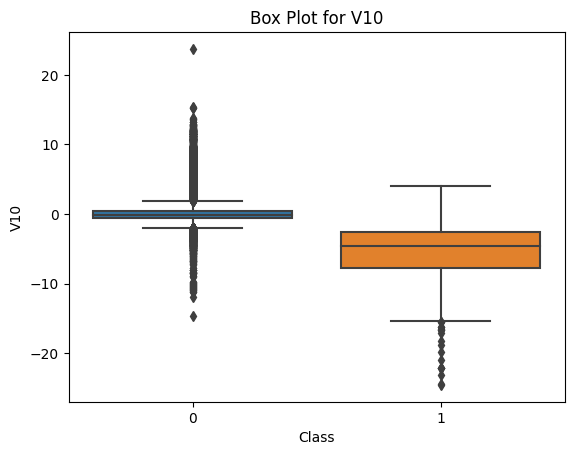

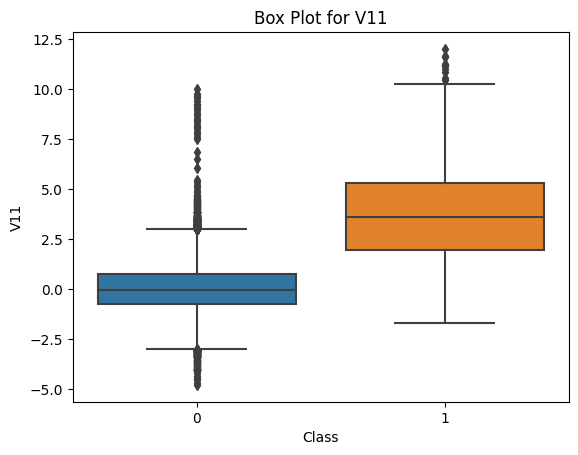

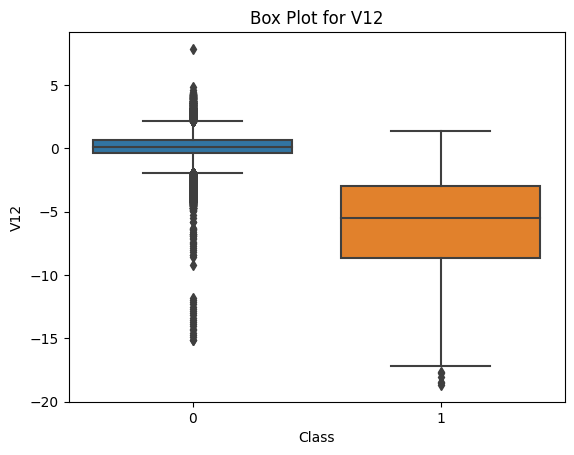

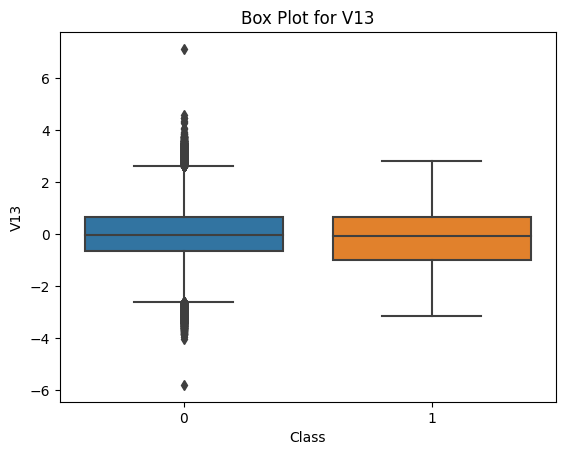

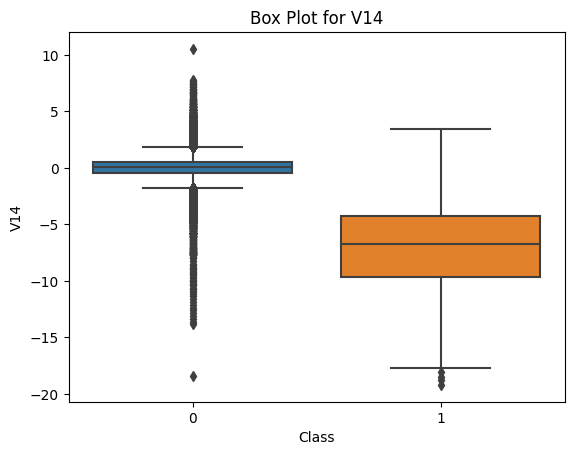

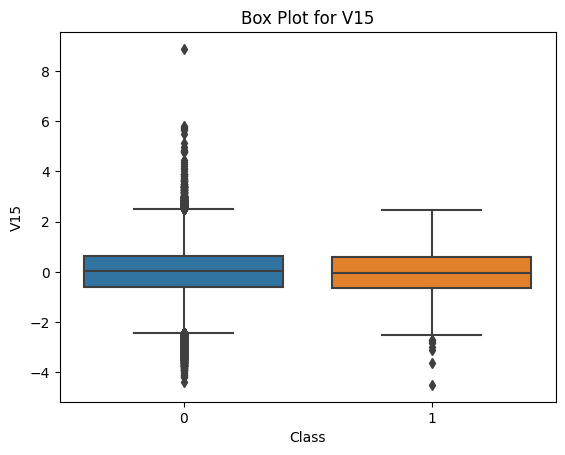

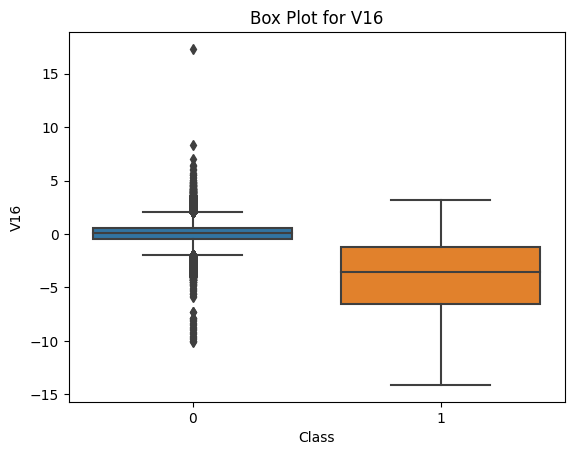

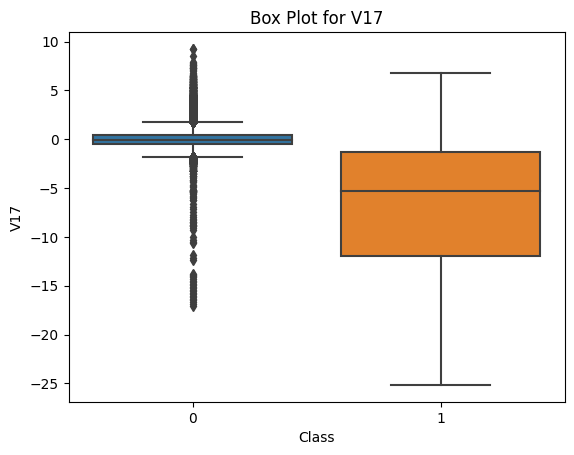

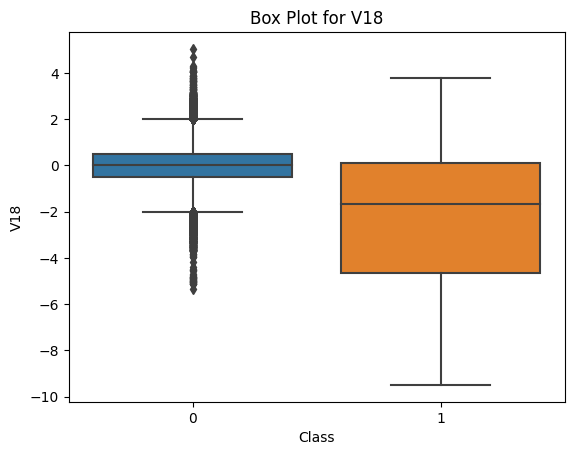

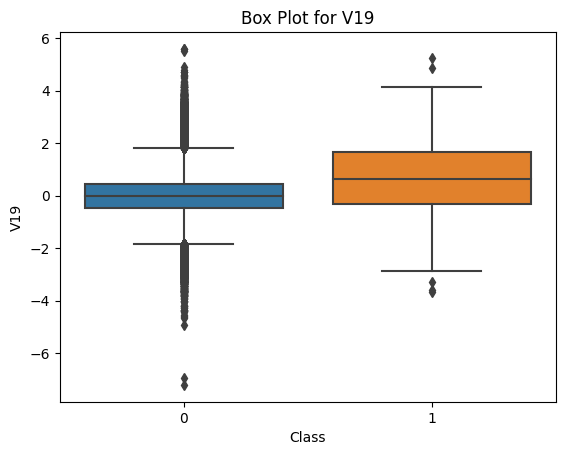

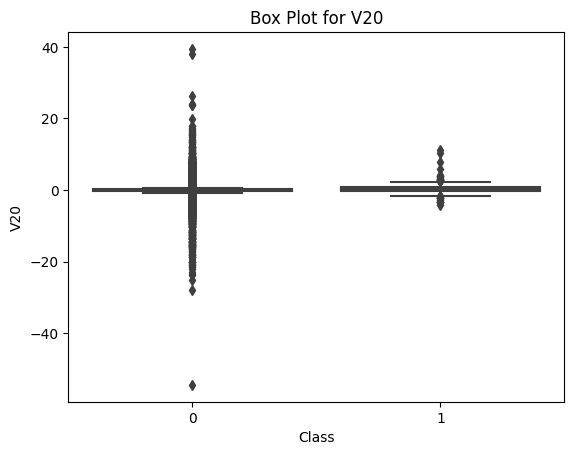

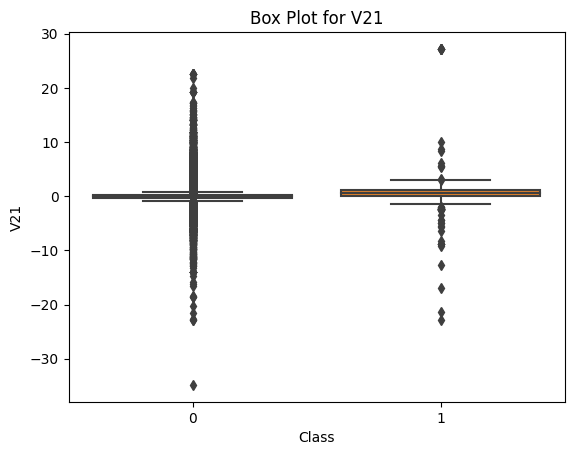

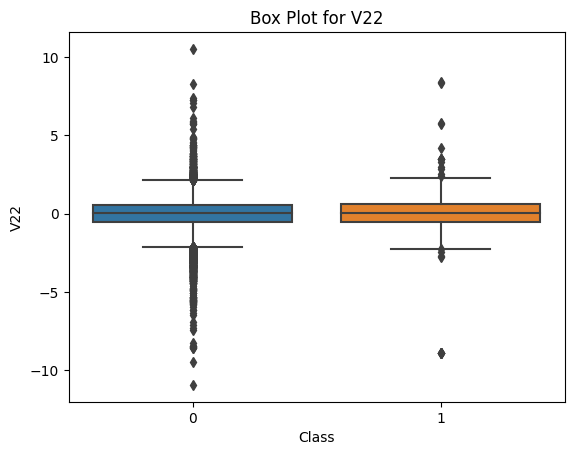

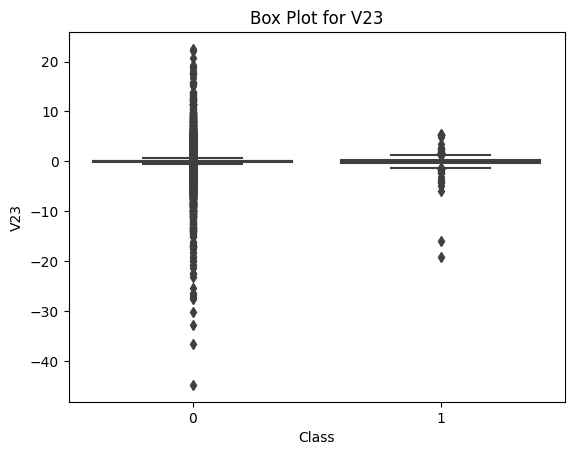

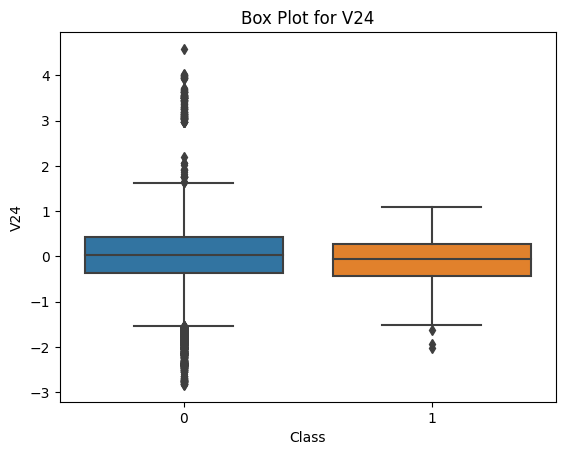

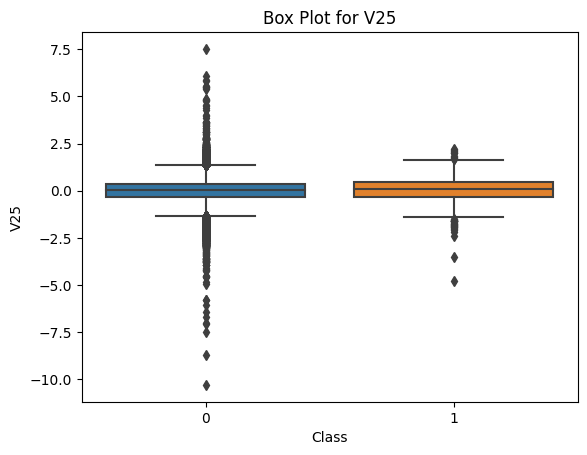

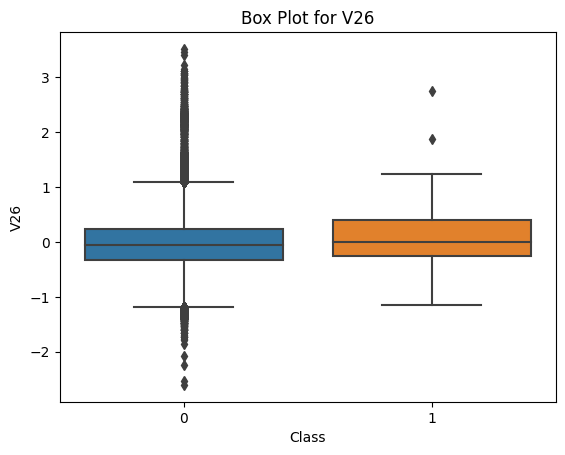

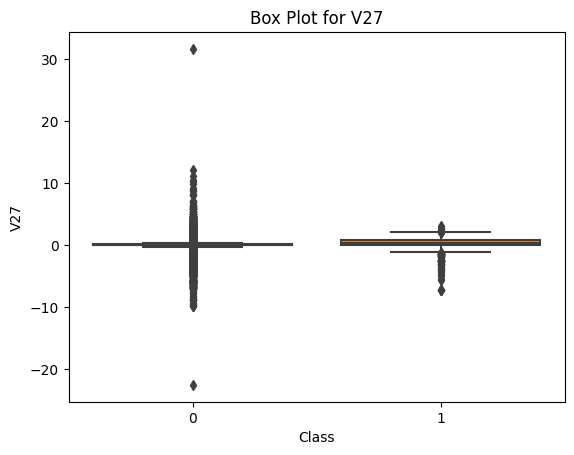

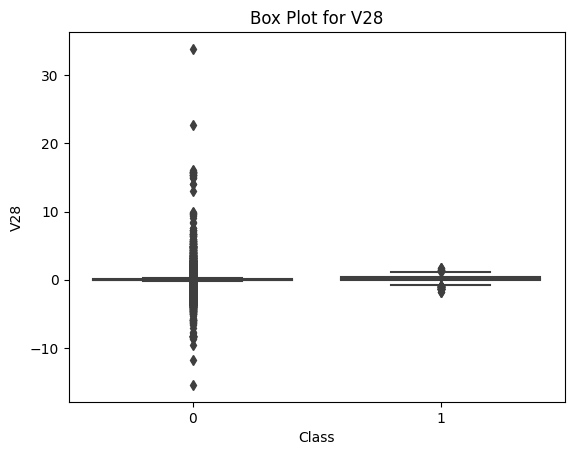

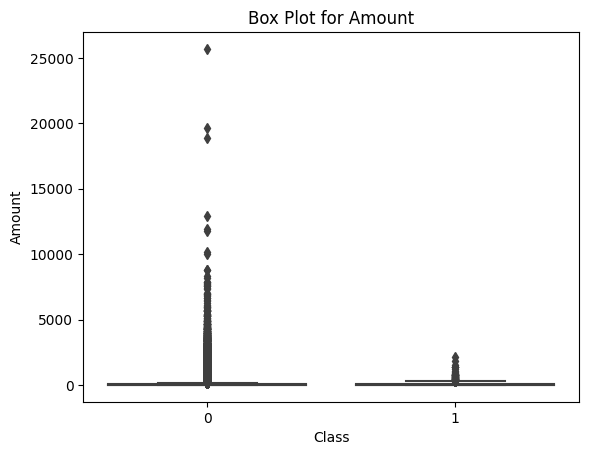

In [69]:
# Select features for box plots
selected_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                     'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                     'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

# Create box plots for each feature grouped by 'Class'
plt.figure(figsize=(7, 5))
for feature in selected_features:
    sns.boxplot(x='Class', y=feature, data=CreditCard_data)
    plt.title(f'Box Plot for {feature}')
    plt.show()

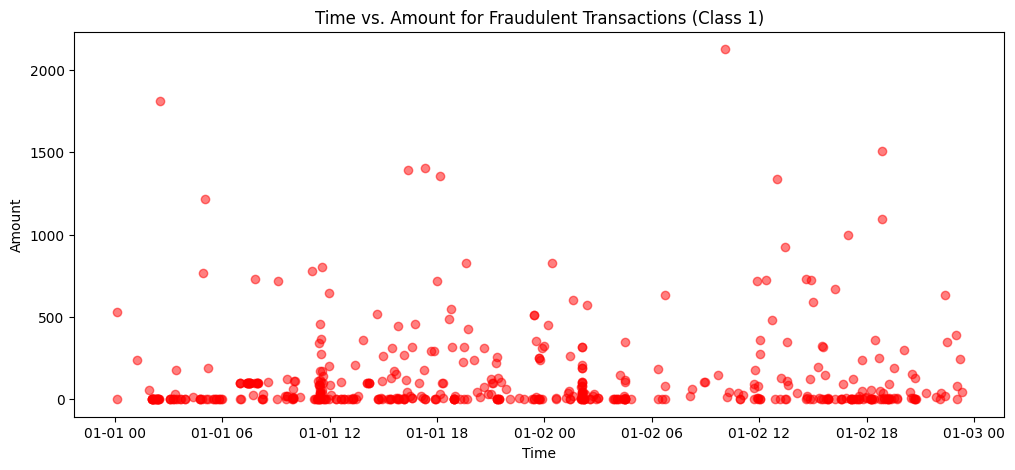

In [70]:
# Filter data for fraudulent transactions (Class 1)
fraudulent_data = CreditCard_data[CreditCard_data['Class'] == 1]

# Plotting 'Time' vs. 'Amount' for fraudulent transactions
plt.figure(figsize=(12, 5))
plt.scatter(fraudulent_data['Time'], fraudulent_data['Amount'], color='red', alpha=0.5)
plt.title('Time vs. Amount for Fraudulent Transactions (Class 1)')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

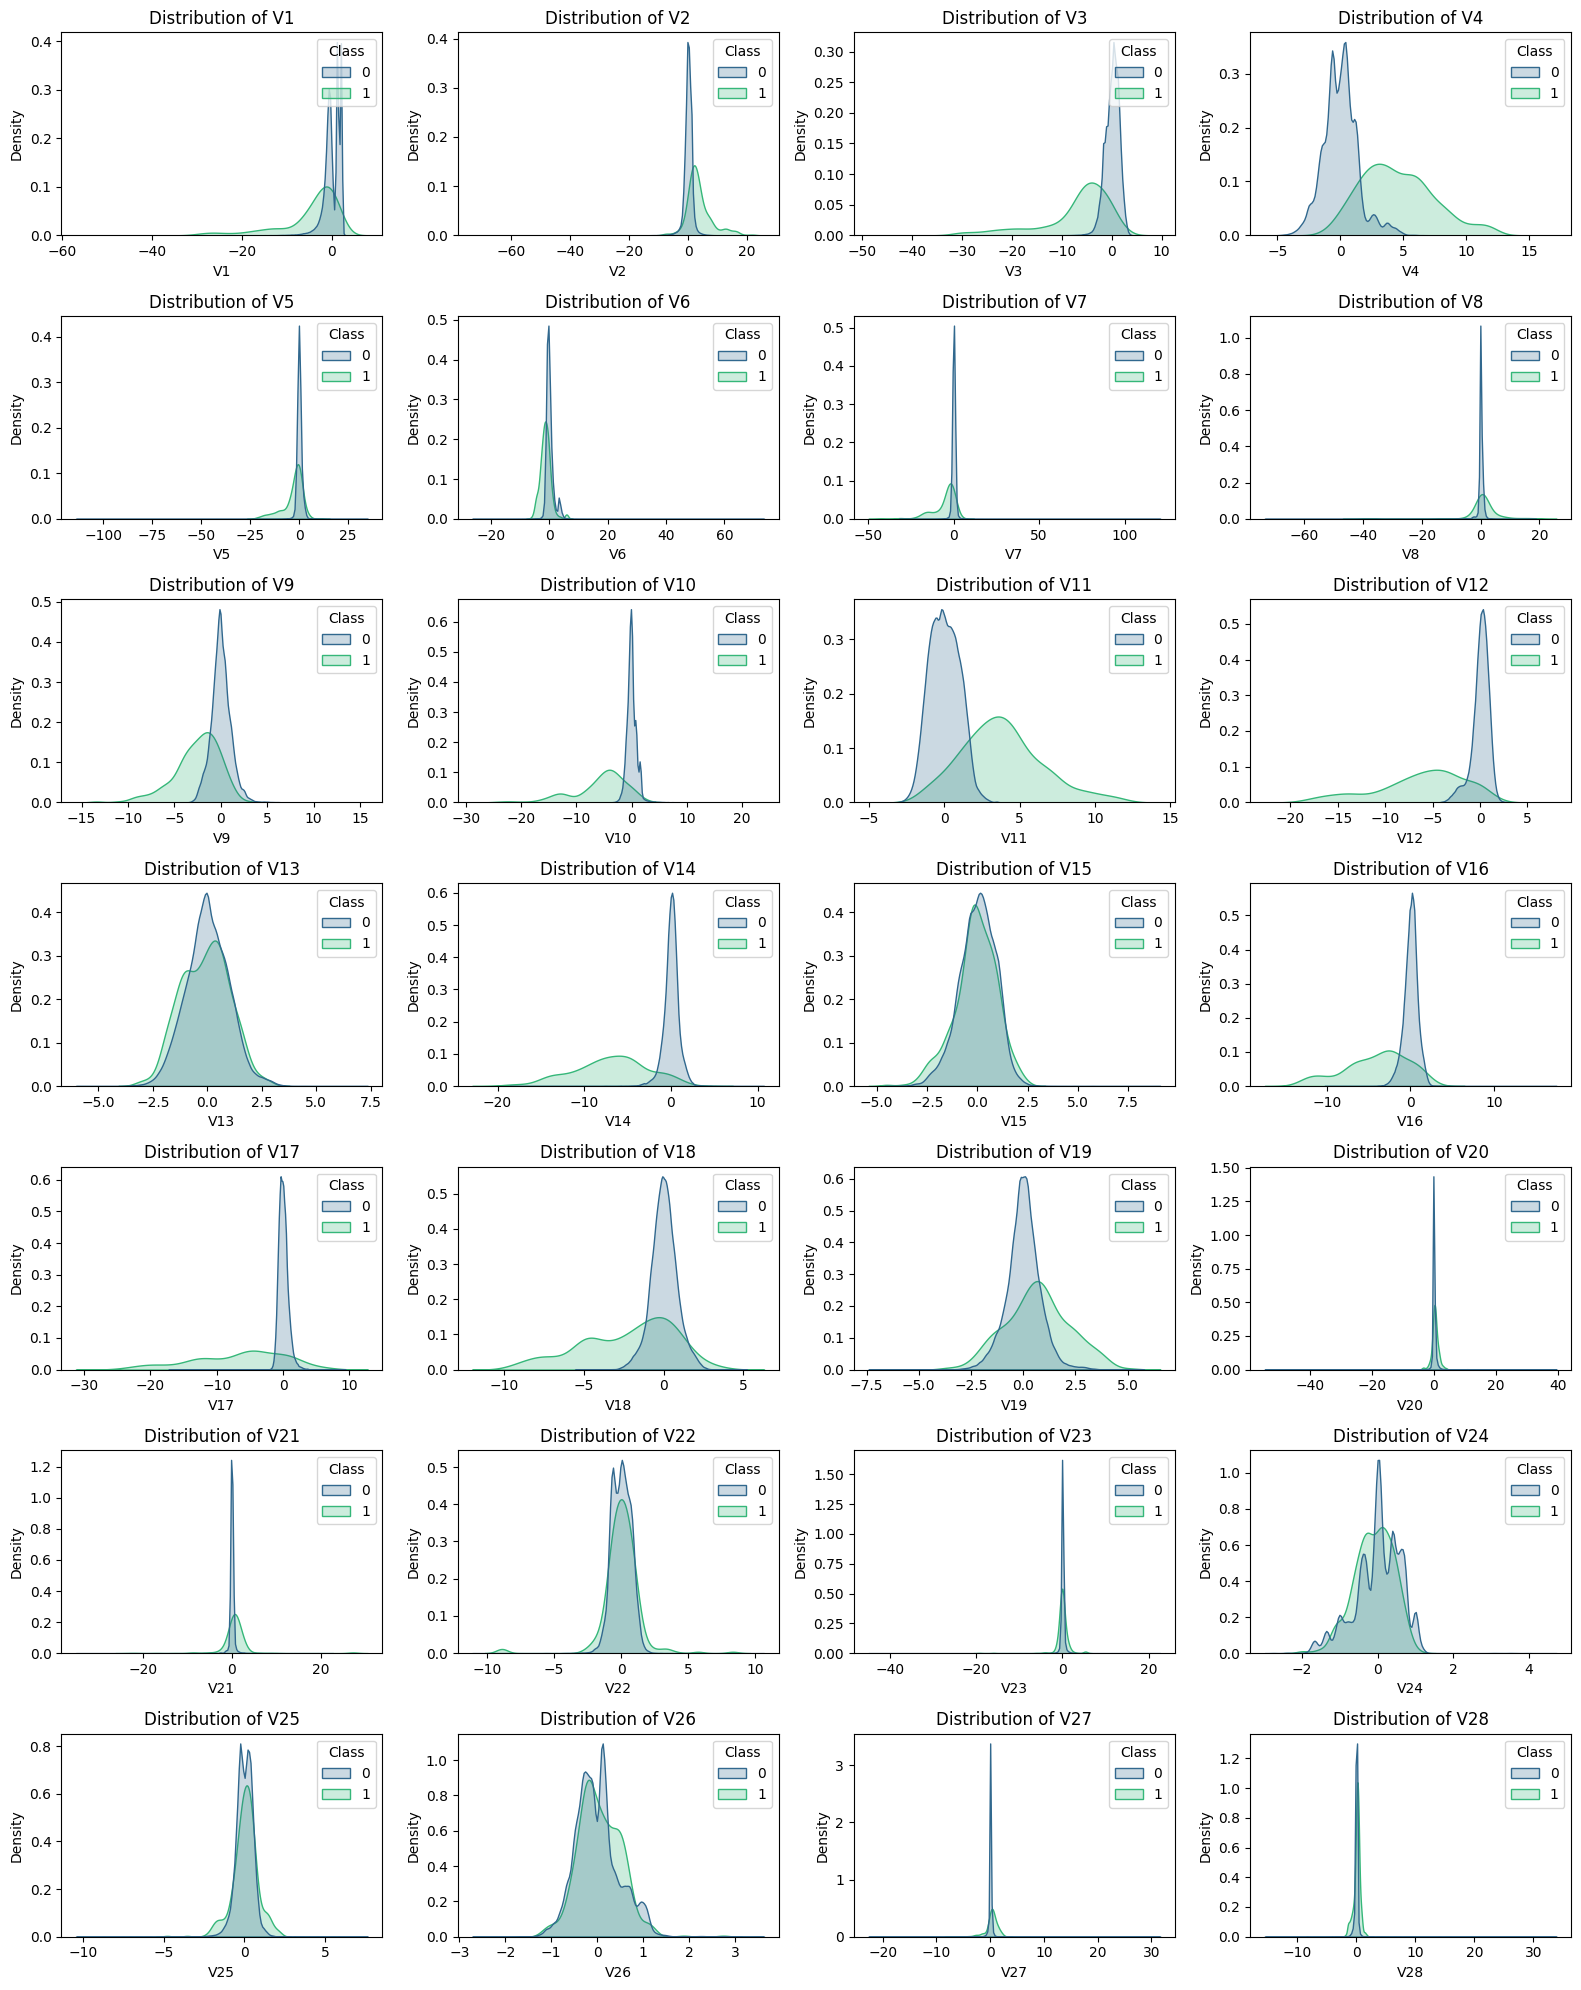

In [71]:
# Select features for distribution plots
selected_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                     'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                     'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

# Create kernel density plots for each feature, grouped by 'Class'
plt.figure(figsize=(16, 20))
for feature in selected_features:
    plt.subplot(7, 4, selected_features.index(feature) + 1)
    sns.kdeplot(data=CreditCard_data, x=feature, hue='Class', fill=True, common_norm=False, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

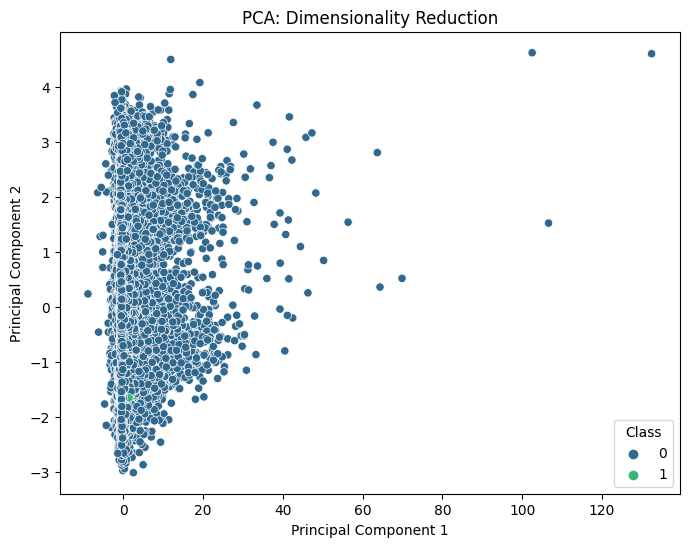

In [76]:
# Exclude datetime columns from the features
X = CreditCard_data.drop(['Class', 'Time'], axis=1)

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA with two components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame with the reduced features and target variable
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Class'] = CreditCard_data['Class']

# Plot the data in lower-dimensional space
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Class', data=pca_df, palette='viridis')
plt.title('PCA: Dimensionality Reduction')
plt.show()

The plot above show Dimensionality Reduction:
Apply dimensionality reduction techniques such as PCA (Principal Component Analysis) to visualize the data in lower-dimensional space and observe if there are natural clusters or separations between classes


In [85]:
# Separate features (X) and target variable (y)
X = CreditCard_data.drop('Class', axis=1)
y = CreditCard_data['Class']


In [87]:
# Convert datetime features to numerical values (you may need to customize this based on your actual data)
X['Time'] = pd.to_numeric(X['Time'])

In [88]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [89]:
# Create a pipeline with preprocessing, oversampling, and a random forest classifier
model = Pipeline([
    ('scaler', StandardScaler()),  # Standardize numerical features
    ('oversampler', RandomOverSampler(sampling_strategy=0.5)),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [90]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('oversampler', RandomOverSampler(sampling_strategy=0.5)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [91]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [92]:
# Evaluate the model's performance
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Interpretaion from the classification report.

Precision:
The Precision for Class 0 (Genuine Transactions): 1.00
This means that, among the instances predicted as genuine (Class 0), all of them were actually genuine. It's the ratio of true positives to the sum of true positives and false positives for Class 0.
Precision for Class 1 (Fraudulent Transactions): 0.97
For the instances predicted as fraudulent (Class 1), 97% were actually fraudulent. It's the ratio of true positives to the sum of true positives and false positives for Class 1.
Recall (Sensitivity or True Positive Rate):
Recall for Class 0 (Genuine Transactions): 1.00

This means that, among all the actual genuine instances, the model correctly identified all of them. It's the ratio of true positives to the sum of true positives and false negatives for Class 0.
Recall for Class 1 (Fraudulent Transactions): 0.78

For the actual fraudulent instances, the model identified 78% of them. It's the ratio of true positives to the sum of true positives and false negatives for Class 1.
F1-Score:
F1-Score for Class 0 (Genuine Transactions): 1.00

The F1-score is the harmonic mean of precision and recall. For Class 0, it indicates a perfect balance between precision and recall.
F1-Score for Class 1 (Fraudulent Transactions): 0.86

The F1-score for Class 1 is lower, indicating a slight imbalance between precision and recall. It's a trade-off between precision and recall.
Support:
Support for Class 0 (Genuine Transactions): 56864

The number of instances in the actual Class 0 (genuine transactions).
Support for Class 1 (Fraudulent Transactions): 98

The number of instances in the actual Class 1 (fraudulent transactions).

Accuracy:
Overall Accuracy: 1.00
The proportion of correctly classified instances (both genuine and fraudulent). It's the ratio of correct predictions to the total number of instances.
Macro Avg and Weighted Avg:
Macro Avg (Unweighted Average): 0.99 (precision), 0.89 (recall), 0.93 (F1-score)

Averaging the metrics across both classes without considering class imbalance.
Weighted Avg: 1.00 (precision), 1.00 (recall), 1.00 (F1-score)

Averaging the metrics across both classes with weights proportional to the number of instances in each class.
In summary, your model has excellent performance for Class 0 (genuine transactions) and good performance for Class 1 (fraudulent transactions). The high precision and recall for Class 0 suggest that the model is accurately identifying genuine transactions. For Class 1, the slightly lower recall indicates that there may be some instances of fraudulent transactions that the model is not capturing. The F1-score provides a balanced metric considering both precision and recall. Overall accuracy is very high, but it's crucial to consider the specific requirements of your application and the importance of correctly identifying fraudulent transactions.